# Лабораторная работa 1. Введение в NLP

#### Работу выполнил: `Самойло Алексанр`, студент группы ФИб-4

Вспомните возможности языка python на основе материалов курса "Основы python" хэндбука от `Yandex`- [ссылка](https://education.yandex.ru/handbook/python).

Особенно обратите внимание на темы:
- 3.1 Строки, кортежи, списки
- 3.2 Множества, словари
- 4.2 Позиционные и именованные аргументы. Функции высших порядков. Лямбда-функции
- 4.3 Рекурсия. Декораторы. Генераторы
- 6.1 Модули `math` и `numpy`
- 6.2 Модуль `pandas`

Для обработки текстов на русском языке можно использовать модуль 'Natasha` (руководство - [статья на Хабр](https://habr.com/ru/articles/516098/)).

### Краткое руководство модуля Natasha
#### Импорт библиотек и создание объекта для работы с текстом
Импортируйте библиотеки для сегментации на предложения, морфологического и синтаксического анализа.

```python
from natasha import(
    Segmenter,
    MorphVocab,
    NewsEmbedding,
    NewsMorphTagger,
    NewsSyntaxParser,
    Doc,
)
```

Создайте объект из обрабатываемого текста `text`:

```python
text_doc = Doc(text)
```

#### Сегментация на предложения
Создайте объект, который будет выполнять сегментацию текста на предложения:

```python
segmenter = Segmenter()
```

С помощью сегментатора можно разбить текст на предложения и токены:

```python
text_doc.segment(segmenter)
print(text_doc.tokens)
print(text_doc.sents)
```

#### Морфологический анализ

Инициализируйте словарь и морфологический анализатор:
```python
morph_vocab = MorphVocab()
morph_tagger = NewsMorphTagger(emb)
```

Чтобы получить морфологическую разметку слова `word` воспользуйтесь:

```python
morph_vocab.parse(word)
```

Добавить морфологическую разметку к объекту обрабатываемого текста (Doc) можно как

```python
text_doc.tag_morph(morph_tagger)
print(text_doc.tokens)
text_doc.sents[0].morph.print()
```

**Лемматизаиця** - приведение словоформы начальной форме слова.
Получить леммы текста можно через метод `lemmatize`:

```python
for token in text_doc.tokens:
    token.lemmatize(morph_vocab)
{_.text: _.lemma for _ in text_doc.tokens}
```

## Часть 1. Анализ текстового корпуса

*Задание 1.1*

Загрузите в `pandas` датафрейм новостной датасет [`lenta_ru_news_filtered.csv`](https://drive.google.com/file/d/16pyL2sgbsFsyuMpB_tpE3w9OLcumtVFN/view?usp=sharing), собранный на базе корпуса `lenta.ru_v1.0`. В датасете каждая новость описывается следующими полями:

- **url** - адрес новости на сайте lenta.ru,
- **topic** - тема новости,
- **title** - заголовок новости,
- **text** - текст новости.

Ответьте на следуюшие вопросы:

- Сколько всего новостных текстов в датасете?
- На какие темы встречаются новости?
- Сколько новостных текстов по каждой из тем?

In [ ]:
import pandas as pd

file_id = '16pyL2sgbsFsyuMpB_tpE3w9OLcumtVFN'
url = f'https://drive.google.com/uc?export=download&id={file_id}'

df = pd.read_csv(url)

print('Всего новостных текстов в df:')
df.info()

unique_topics = df['topic'].unique()
print(f"Всего уникальных тем: {len(unique_topics)}")
print("Уникальные темы:", unique_topics)

for topic in unique_topics:
  count = len(df[df['topic'] == topic])
  print(f'В теме "{topic}" всего {count} новостей')

Всего новостных текстов в df:
<class 'pandas.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  4000 non-null   int64
 1   url         4000 non-null   str  
 2   topic       4000 non-null   str  
 3   title       4000 non-null   str  
 4   text        4000 non-null   str  
dtypes: int64(1), str(4)
memory usage: 156.4 KB
Всего уникальных тем: 2
Уникальные темы: <StringArray>
['Культура', 'Экономика']
Length: 2, dtype: str
В теме "Культура" всего 2000 новостей
В теме "Экономика" всего 2000 новостей


*Задание 1.2*

Постройте гистограмму распределения длин в **символах** текстов новостного корпуса.

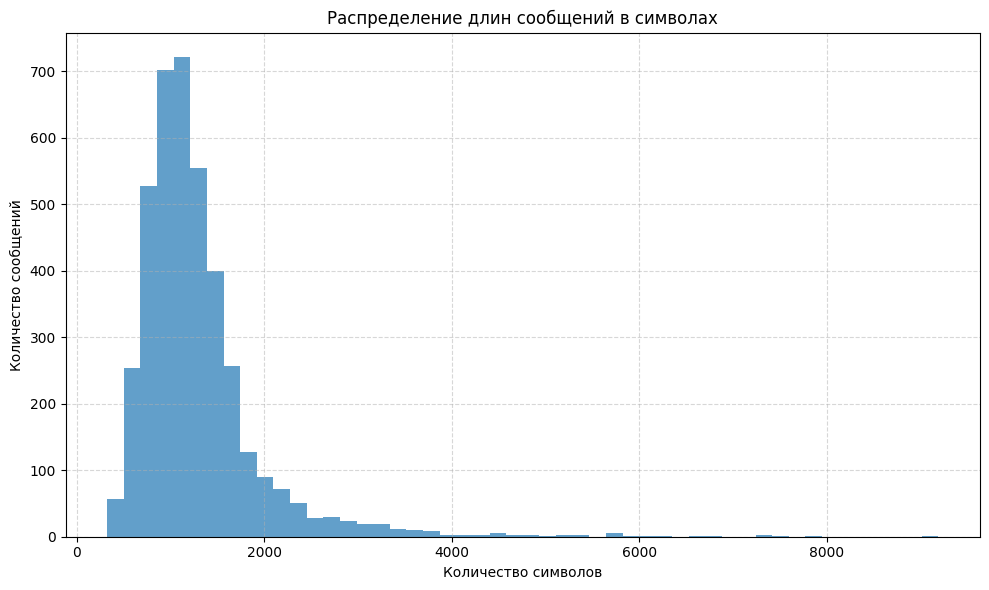

In [29]:
import matplotlib.pyplot as plt

df['text_len'] = df['text'].astype(str).str.len()
plt.figure(figsize=(10, 6))
plt.hist(df['text_len'], bins=50, alpha=0.7)
plt.title('Распределение длин сообщений в символах')
plt.xlabel('Количество символов')
plt.ylabel('Количество сообщений')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

*Задание 1.3*

Постройте гистограмму распределения длин в **словах** текстов новостного корпуса.

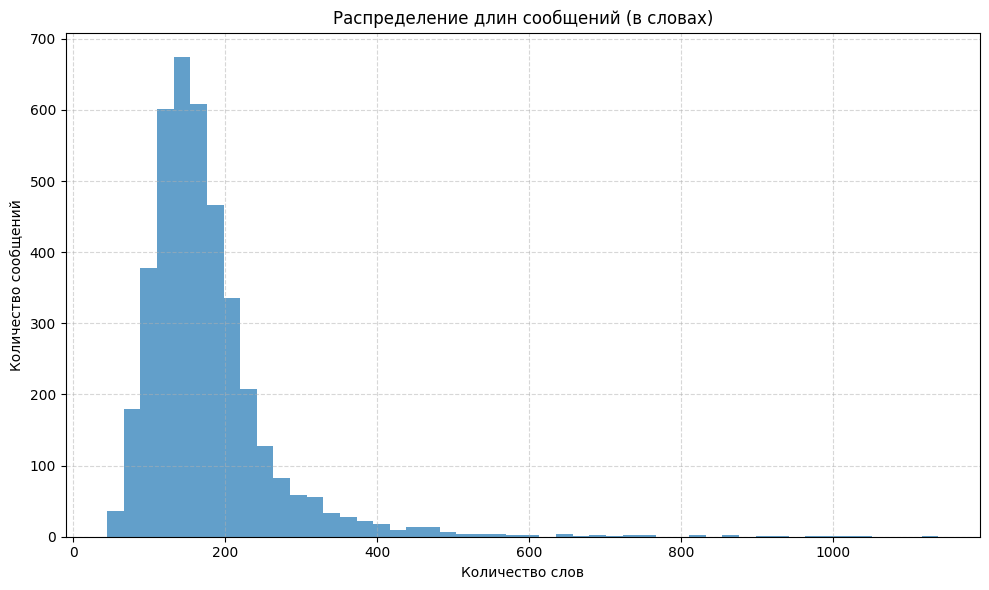

In [30]:
df['word_count'] = df['text'].astype(str).str.split().str.len()

plt.figure(figsize=(10, 6))
plt.hist(df['word_count'], bins=50, alpha=0.7)
plt.title('Распределение длин сообщений (в словах)')
plt.xlabel('Количество слов')
plt.ylabel('Количество сообщений')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

*Задание 1.4*

Постройте гистограмму распределения длин слов, встречающихся в новостных текстах. Какова максимальная и минимальная длины слов?

Максимальная длина встречающегося слова 227
Минимальная длина встречающегося слова 1


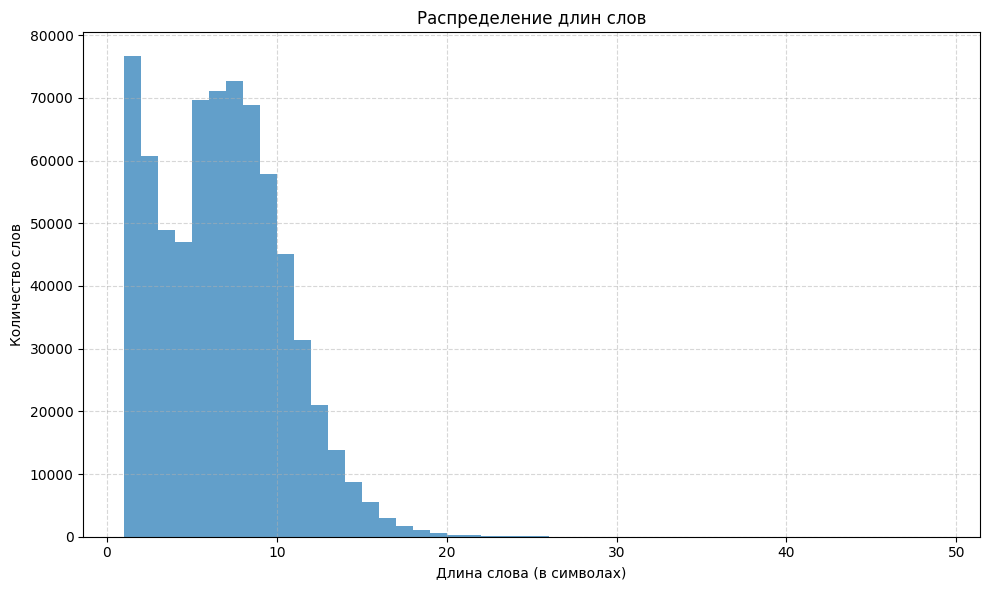

In [46]:
all_words = ' '.join(df['text'].astype(str)).lower().split()
word_lengths = [len(word) for word in all_words]

plt.figure(figsize=(10, 6))
plt.hist(word_lengths, bins=range(1,50), alpha=0.7)
plt.title('Распределение длин слов')
plt.xlabel('Длина слова (в символах)')
plt.ylabel('Количество слов')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

print('Максимальная длина встречающегося слова', max(word_lengths))
print('Минимальная длина встречающегося слова', min(word_lengths))

*Задание 1.5*

Сделайте лемматизиацию новостных текстов и сохраните полученные тексты, например в новый столбец датафрейма с датасетом(они пригодятся в части 3 этой лабораторной работы).

!!! Заметьте, что в `pandas` можно сохранять датафрейм в файл (файл из `colab` можно скачать из раздела `Files`). Это удобно, чтобы исключить повторную обработку при перезапуске сессии в `colab`.

In [32]:
from pymorphy3 import MorphAnalyzer
import re
from tqdm.auto import tqdm

tqdm.pandas(desc="Лемматизация текста")

morph = MorphAnalyzer()


def preprocess_text(text: str) -> str:
    if not isinstance(text, str):
        return ""

    text = re.sub(r'[^а-яА-ЯёЁa-zA-Z\s]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()

    tokens = text.split()
    lemmatized_tokens = []

    for word in tokens:
        parsed = morph.parse(word)
        lemma = parsed[0].normal_form if parsed else word

        # сохраняем капитализацию первой буквы
        if word.istitle():
            lemma = lemma.capitalize()
        elif word.isupper():
            lemma = lemma.upper()

        lemmatized_tokens.append(lemma)

    return " ".join(lemmatized_tokens)


df['processed_text'] = df['text'].progress_apply(preprocess_text)

df.to_csv("data\\news_lemmatized.csv", index=False)

Лемматизация текста: 100%|██████████| 4000/4000 [04:38<00:00, 14.39it/s]


In [33]:
df['processed_text'].head(10)

0    Президент Россия Владимир Путин выступать на з...
1    Владимир Путин пообещать разобраться с открыти...
2    В Ташкент скончаться участник юмористический т...
3    Гитарист виртуоз и композитор Виктор Зинчук го...
4    Коллега актёр Андрей Гайдуляна известный по се...
5    Американский актриса Сондра Локк звезда фильм ...
6    Лауреат три премия Грэмми джазовый певица Нэнс...
7    Дом один из основатель группа The Beatles Пол ...
8    Главный кинокритик журнал The Hollywood Report...
9    В сеть появиться шуточный видео на который Кит...
Name: processed_text, dtype: str

## Часть 2. Регулярные выражения в обработке тектов

**Полезные ссылки**: <a href=https://habr.com/ru/articles/349860/>cтатья на Хабре про регулярные выражения </a> и <a href=https://regex101.com/>помощник для составления регулярных выражений</a>

**Тексты для тестирования** выполнения заданий на регулярные выражения:

А) Приветствуем вас в нашем туристическом агентстве! Мы готовы предложить вам незабываемые путешествия в различные уголки мира.  Наша команда профессионалов всегда готова помочь вам с выбором лучшего маршрута, который будет соответствовать вашим предпочтениям и бюджету. Мы предлагаем широкий выбор туров, от пляжного отдыха до экстремальных приключений. Для связи с нами вы можете использовать следующие адреса электронной почты: info@touragency.com, support@touragency.com или sales@touragency.com. Наши менеджеры - это опытные специалисты, которые знают все тонкости организации путешествий. Мы работаем с лучшими отелями и авиакомпаниями, чтобы обеспечить вам максимальный комфорт и безопасность во время вашего отдыха. Не упустите возможность отправиться в незабываемое путешествие с нашей помощью! Свяжитесь с нами по одному из указанных адресов электронной почты или позвоните по телефону 8(495)123-45-67

Б) Мы предлагаем туры в город Париж, город Рим, город Барселона и город Лондон. Каждый из этих городов имеет свою уникальную атмосферу и достопримечательности, которые стоит увидеть своими глазами. Мы также предлагаем индивидуальные туры, которые будут разработаны специально для вас. Вы можете выбрать любой город или страну, которую вы хотите посетить, и мы организуем для вас незабываемое путешествие. Пишите нам по адресу: г. Киров, ул. Труда, д. 105, оф. 110

В) Бот должен решать арифметические задачи, например, 2+3 или 145-80*(10-12), и правильно выдавать ответ. Хотелось бы повести соревнование на скорость, кто быстрее будет считать такие примеры как 105-10*2 - написанный вами бот или школьник.

Г) Заказ пришёл на следующие произведения: Агата Кристи "Эркюль Пуаро", Пушкин А.С. "Евгений Онегин" и Хорхе Луи Борхес "Сад расходящихся троп".

Д) Попробуйте почитать статьи на эту тему. Например, вам помогут статьи Subhabrata Mukherjee Et Al "Orca: Progressive Learning from Complex Explanation Traces of GPT-4" и Arindam Mitra Et Al "Orca 2: Teaching Small Language Models How to Reason". Также смотрите руководство на сайте "Huggingface".

Е) Осторожно! С этого номера 88007777777 постояно звонят мошенники. Будьте бдительны. Моему товарищу уже поступило 8 звонков от них. Телефон тех.поддержки 8-929-100-20-33 или 8(8334)65-67-98.

*Задание 2.1*<br>
Напишите функцию, которая принимает текст и извлекает из него адреса электоронной почты в виде списка. Для тестирования используйте текст А и аналогичные ему тексты.

In [34]:
text = 'Приветствуем вас в нашем туристическом агентстве! Мы готовы предложить вам незабываемые путешествия в различные уголки мира. Наша команда профессионалов всегда готова помочь вам с выбором лучшего маршрута, который будет соответствовать вашим предпочтениям и бюджету. Мы предлагаем широкий выбор туров, от пляжного отдыха до экстремальных приключений. Для связи с нами вы можете использовать следующие адреса электронной почты: info@touragency.com, support@touragency.com или sales@touragency.com. Наши менеджеры - это опытные специалисты, которые знают все тонкости организации путешествий. Мы работаем с лучшими отелями и авиакомпаниями, чтобы обеспечить вам максимальный комфорт и безопасность во время вашего отдыха. Не упустите возможность отправиться в незабываемое путешествие с нашей помощью! Свяжитесь с нами по одному из указанных адресов электронной почты или позвоните по телефону 8(495)123-45-67'
email_list = re.findall(r'\S+@\S+\.\S+', text)

print("Найденные email-адреса:")
for i, email in enumerate(email_list, 1):
    print(f"{i}. {email}")

print(f"\nВсего найдено: {len(email_list)} email-адресов")

Найденные email-адреса:
1. info@touragency.com,
2. support@touragency.com
3. sales@touragency.com.

Всего найдено: 3 email-адресов


*Задание 2.2a*

Напишите функцию, которая принимает текст и извлекает из него названия городов, если в тексте перед названием встречается `г.` или `город`. Для тестирования используйте текст Б и аналогичные ему тексты.

In [35]:
text = ' Мы предлагаем туры в город Париж, город Рим, город Барселона и город Лондон. Каждый из этих городов имеет свою уникальную атмосферу и достопримечательности, которые стоит увидеть своими глазами. Мы также предлагаем индивидуальные туры, которые будут разработаны специально для вас. Вы можете выбрать любой город или страну, которую вы хотите посетить, и мы организуем для вас незабываемое путешествие. Пишите нам по адресу: г. Киров, ул. Труда, д. 105, оф. 110'
cities_names = re.findall(r'(?:г\.|город|Город)\s+([А-ЯЁ][а-яё\-]+)(?=[\s,\.;:!?]|$)', text)
print("Найденные имена городов:")
for i, city in enumerate(cities_names, 1):
    print(f"{i}. {city}")

print(f"\nВсего найдено: {len(cities_names)} городов")

Найденные имена городов:
1. Париж
2. Рим
3. Барселона
4. Лондон
5. Киров

Всего найдено: 5 городов


*Задание 2.2b*

Приведите примеры текстов двух **разных** "сложных" случаев, когда используемый вами подход к выделению названия города, описанный в задании, отработает неправильно.

In [36]:
text = 'Мы отправились в г. Сергиев Посад, чтобы посетить Троице-Сергиеву лавру.'
text2='Вес товара составляет 100 г. Москва - столица.'
cities_names1 = re.findall(r'(?:г\.|город|Город)\s+([А-ЯЁ][а-яё\-]+)(?=[\s,\.;:!?]|$)', text)
cities_names2 = re.findall(r'(?:г\.|город|Город)\s+([А-ЯЁ][а-яё\-]+)(?=[\s,\.;:!?]|$)', text2)
print("Найденные имена городов в первом случае:")
for i, city in enumerate(cities_names1, 1):
    print(f"{i}. {city}")

print(f"\nВсего найдено: {len(cities_names1)} городов\n")
print("Найденные имена городов во втором случае:")
for i, city in enumerate(cities_names2, 1):
    print(f"{i}. {city}")

print(f"\nВсего найдено: {len(cities_names2)} городов")

Найденные имена городов в первом случае:
1. Сергиев

Всего найдено: 1 городов

Найденные имена городов во втором случае:
1. Москва

Всего найдено: 1 городов


*Задание 2.3*<br>
Напишите функцию, которая принимает текст и извлекает из него все арифметические выражения в виде списка. Для тестирования используйте текст В и аналогичные ему тексты.

In [37]:
import re
text='Бот должен решать арифметические задачи, например, 2+3 или 145-80*(10-12), и правильно выдавать ответ. Хотелось бы повести соревнование на скорость, кто быстрее будет считать такие примеры как 105-10*2 - написанный вами бот или школьник.'
values = re.findall(r'[0-9()]+(?:\s*[+\-*\/%]\s*[0-9()]+)+', text);
print("Найденные арифметические выражения:")

for i, expr in enumerate(values, 1):
    try:
        result = eval(expr)
        print(f"{i}. {expr} = {result}")
    except ZeroDivisionError:
        print(f"{i}. {expr} = Ошибка (деление на ноль)")
    except Exception as e:
        print(f"{i}. {expr} = Ошибка вычисления")

print(f"\nВсего найдено: {len(values)} выражений")

Найденные арифметические выражения:
1. 2+3 = 5
2. 145-80*(10-12) = 305
3. 105-10*2 = 85

Всего найдено: 3 выражений


*Задание 2.4*

Напишите функцию, которая принимает текст и извлекает из него фамилию и имя/инициалы автора/ов (написаны с большой буквы) книги или статьи, которая заключена в кавычках. Функция должна работать для русскоязычных и англоязычных текстов. Для тестирования используйте тексты Г, Д и аналогичные им тексты.

In [38]:
from typing import List


def extract_authors(text: str) -> List[str]:
    if not isinstance(text, str):
        return []

    pattern = re.compile(
        r'([A-ZА-ЯЁ][a-zа-яё]+'
        r'(?:\s+[A-ZА-ЯЁ][a-zа-яё]+|'          # имя/фамилия
        r'\s+[A-ZА-ЯЁ]\.[A-ZА-ЯЁ]\.|'          # A.S.
        r'\s+Et\s+Al)*)'                      # Et Al
        r'\s+"[^"]+"'
    )

    matches = pattern.findall(text)

    return matches


text_g = (
    'Заказ пришёл на следующие произведения: '
    'Агата Кристи "Эркюль Пуаро", '
    'Пушкин А.С. "Евгений Онегин" '
    'и Хорхе Луи Борхес "Сад расходящихся троп".'
)

text_d = (
    'Например, вам помогут статьи '
    'Subhabrata Mukherjee Et Al "Orca: Progressive Learning from Complex Explanation Traces of GPT-4" '
    'и Arindam Mitra Et Al "Orca 2: Teaching Small Language Models How to Reason". '
    'Также смотрите руководство на сайте "Huggingface".'
)

print(extract_authors(text_g))
print(extract_authors(text_d))

['Агата Кристи', 'Пушкин А.С.', 'Хорхе Луи Борхес']
['Subhabrata Mukherjee Et Al', 'Arindam Mitra Et Al']


*Задание 2.5*<br>
Напишите функцию, которая принимает текст и извлекает из него предложения (оканчиваются `.`, `!` или `?`), в которых встречаются года, записанные в виде четырёх чисел в диапазоне от 1900 до 2025, например 1996.

In [39]:
YEAR_PATTERN = re.compile(r'\b(19\d{2}|20\d{2}|202[0-5])\b')


def extract_sentences_with_years(text: str) -> List[str]:

    if not isinstance(text, str):
        return []

    sentences = re.split(r'(?<=[.!?])\s+', text.strip())

    result = []

    for sentence in sentences:
        years = YEAR_PATTERN.findall(sentence)
        if years:
            result.append(sentence.strip())

    return result


text = ("Компания была основана в 1996 году. "
    "В 1888 году произошло важное событие. "
    "В 2024 компания выпустила новый продукт! "
    "Следующий релиз ожидается в 2026 году. "
    "В 2005 году началась новая эра? "
    "Просто текст без года."
)

extracted = extract_sentences_with_years(text)

print("Найденные предложения:")
for sentence in extracted:
    print("-", sentence)

Найденные предложения:
- Компания была основана в 1996 году.
- В 2024 компания выпустила новый продукт!
- Следующий релиз ожидается в 2026 году.
- В 2005 году началась новая эра?


*Задание 2.6*<br>
Напишите функцию, которая принимает текст и меняет его, заменив в номерах телефонах префикс с 8... на +7. Для тестирования используйте текст Е и аналогичные ему тексты.

In [40]:
PHONE_PATTERN = re.compile(
    r'\b8(?=[\d\-\(\)]{9,}\b)([\d\-\(\)]*)'
)


def replace_phone_prefix(text: str) -> str:
    if not isinstance(text, str):
        return text

    def replacer(match: re.Match) -> str:
        return "+7" + match.group(1)

    return PHONE_PATTERN.sub(replacer, text)


test_text = (
        "Осторожно! С этого номера 88007777777 постояно звонят мошенники. "
        "Будьте бдительны. Моему товарищу уже поступило 8 звонков от них. "
        "Телефон тех.поддержки 8-929-100-20-33 или 8(8334)65-67-98."
)

updated_text = replace_phone_prefix(test_text)

print("Исходный текст:\n")
print(test_text)
print("\nИзменённый текст:\n")
print(updated_text)

Исходный текст:

Осторожно! С этого номера 88007777777 постояно звонят мошенники. Будьте бдительны. Моему товарищу уже поступило 8 звонков от них. Телефон тех.поддержки 8-929-100-20-33 или 8(8334)65-67-98.

Изменённый текст:

Осторожно! С этого номера +78007777777 постояно звонят мошенники. Будьте бдительны. Моему товарищу уже поступило 8 звонков от них. Телефон тех.поддержки +7-929-100-20-33 или +7(8334)65-67-98.


## Часть 3. Извлечение именнованных сущностей из текстов на основе регулярных выражений

*Задание 3.1*

Используя регулярные выражения, извлеките из лемматизированных новостных текстов датасета `lenta_ru_news_filtered.csv` (см. часть 1) именнованные сущности `ПЕРСОНА`, которые встречаются в тексте как <Фамилия Имя> или <Фамилия Инициалы>. Подсчитайте сколько раз встречается каждая и выведите топ-10 наиболее часто встречающихся. Проанализируйте результаты, сделайте выводы об ошибочно извлечённых результатах.

In [ ]:
from collections import Counter

import os

if(df.info()==0):
    file_path = "data\\news_lemmatizes.csv"
    if os.path.exists(file_path):
        df = pd.read_csv(file_path)
    else:
        print(f"Файл {file_path} не найден.")

STOP_PERSONS = {'Санкт', 'Петербург', 'Дальний', 'Восток', 'Нью', 'Йорк', 'Банк', 'Россия', 'Москва','Лос','Анджелес','Саудовский','Аравия', 'Российский', 'Федерация'}

PERSON_PATTERN = re.compile(
    r'\b([А-ЯЁ][а-яё]+'
    r'\s+[А-ЯЁ][а-яё]+|'                 # Фамилия Имя
    r'[А-ЯЁ][а-яё]+\s+[А-ЯЁ]\.[А-ЯЁ]\.)'  # Фамилия И.О.
    #'\b'
)

def extract_persons_from_text(text):
    matches = PERSON_PATTERN.findall(text)
    return [m for m in matches if not any(stop in m for stop in STOP_PERSONS)]


text_column = "processed_text"

all_persons = []

for text in df[text_column]:
    persons = extract_persons_from_text(text)
    all_persons.extend(persons)

counter = Counter(all_persons)

print("ТОП-10 наиболее частых персон:\n")
for name, count in counter.most_common(10):
    print(f"{name}: {count}")

Файл data\news_lemmatizes.csv не найден.
ТОП-10 наиболее частых персон:

Дональд Трамп: 167
Владимир Путин: 166
Дмитрий Медведев: 84
Демьян Кудрявцев: 76
Антон Силуановый: 48
Ленинград Сергей: 46
Харви Вайнштейн: 44
Дмитрий Козак: 44
Максим Орешкин: 41
Андрей Костин: 39


*Задание 3.2*

Используя регулярные выражения, извлеките из лемматизированных новостных текстов датасета `lenta_ru_news_filtered.csv` (см. часть 1) именнованные сущности "ГОД". Подсчитайте сколько раз встречается каждая и выведите топ-10 наиболее часто встречающихся. Сделайте вывод по поводу преобладающего временного периода,которые освещают новостные тексты.

In [ ]:
year_pattern = re.compile(r'\b(1[0-9]{3}|20[0-9]{2})\b')

if(df.info()==0):
    file_path = "data\\news_lemmatizes.csv"
    if os.path.exists(file_path):
        df = pd.read_csv(file_path)
    else:
        print(f"Файл {file_path} не найден.")


all_years = []
for text in df['text'].dropna():
    if isinstance(text, str):
        years = year_pattern.findall(text)
        all_years.extend(years)

counter = Counter(all_years)
print(len(counter))

print("Топ-10 наиболее часто упоминаемых годов:\n")
for year, count in counter.most_common(10):
    print(f"{year}: {count}")


195
Топ-10 наиболее часто упоминаемых годов:

2018: 1138
2017: 843
2019: 597
2016: 312
2014: 200
2015: 188
2020: 142
2013: 115
2011: 102
2024: 96
